In [1]:

import numpy as np

G=6
S=3
T=3
C=1


# task type 0: POTRF 1:SYRK 2:TRSM 3: GEMMS
# all have 4 values, but the last one is used for GEMMS only (-;
# a task is a 4-uple and everything will be stored in dictionnaries later
# succalap is the set of successors in the alap schedule, ie the predecessors in the original graph



def succASAP(x,n):
    tasktype=x[0]
    i=x[1]
    j=x[2]
    k=x[3]
    listsucc=[]
    if tasktype==0:
        if i<n:
            for j in range(i+1,n+1,1):
                y=(2,i,j,0)
                listsucc.append(y)
        else:
            y=(4,0,0,0)
            listsucc.append(y)  
    
    
    if tasktype==1:
        if j<i-1:
            y=(1,i,j+1,0)
            listsucc.append(y)
        else:
            y=(0,i,0,0)
            listsucc.append(y)

           
            
    if tasktype==2:
        if i<=n-1:
            for k in range(i+1,j):
                y=(3,k,j,i)
                listsucc.append(y)
            for k in range(j+1,n+1):
                y=(3,j,k,i)
                listsucc.append(y)
            y=(1,j,i,0)
            listsucc.append(y)


    if tasktype==3:
        if k<i-1:
            y=(3,i,j,k+1)
            listsucc.append(y)
        else:
            y=(2,i,j,0)
            listsucc.append(y)


    return listsucc


# duration is just the duration of a task

def duration(x):
    tasktype=x[0]
    if tasktype==0:
        duration=C
    if tasktype==1:
        duration=S        
    if tasktype==2:
        duration=T
    if tasktype==3:
        duration=G
    return duration

durations = [C, S, T, G]

print(succASAP((0, 3, 0, 0), 15))
# print(succASAP((1,6,3,0)))
# print(succASAP((1,6,5,0)))
# print(succASAP((2,2,4,0)))
# print(succASAP((2,1,5,0)))
# print(succASAP((3,4,5,3)))
# print(succASAP((3,5,6,2)))



[(2, 3, 4, 0), (2, 3, 5, 0), (2, 3, 6, 0), (2, 3, 7, 0), (2, 3, 8, 0), (2, 3, 9, 0), (2, 3, 10, 0), (2, 3, 11, 0), (2, 3, 12, 0), (2, 3, 13, 0), (2, 3, 14, 0), (2, 3, 15, 0)]


In [4]:
def LengthASAP(n,P):


    maxi=(G+T+S+C)*n*n*n
    mini=-1


    #ReadyTasks is the set of tasks that are ready to be processed (all their predecessors have been processed)
    # due to limited resources, they might be waiting for resources
    ReadyTasks=[]
    ReadyTasks.append((0,1,0,0))


    #Ltasks is the list of tasks that have not been processed and that are not yet ready
    LTasks=[]

    #disctionnary Processed provides, for each task, where and when it has been processed
    Processed={}
    #dictionnary Released provides, for each task, the minimum time when it can be processed (-1 at the beginning), 
    # given its already scheduled predecessors. The number of remaining predecessors to be 
    # scheduled is stored in NbSuccASAP={}
    Released={}
    NbPredASAP={}
    # Prio is the priority of the task for the alap.
    # at the moment, Prio is just the length of the critical path in ASAP (because I had the values at hand !)
    Prio={}

    CP=2*C+T+S+(n-2)*(T+G)

    Released[(0,1,0,0)]=mini
    NbPredASAP[(0,1,0,0)]=0
    Prio[(0,1,0,0)]=CP

    # initialization of Prio (critical path in ASAP), Released (-1 at the beginning), 
    # NbSuccASAP (predecessors in ALAP) 

    for i in range(1,n+1):
        Released[(0,i,0,0)]=mini
        Prio[(0,i,0,0)]=CP-(i-1)*(T+G)
    #    Prio[(0,i,0,0)]=n-i
    #    Prio[(0,i,0,0)]=i

        NbPredASAP[(0,i,0,0)]=1
        LTasks.append((0,i,0,0))



    for j in range(1,n):
        for i in range(j+1,n+1):
            Released[(1,i,j,0)]=mini
            LTasks.append((1,i,j,0))
            if i < n:
                Prio[(1,i,j,0)]=CP-(i-1)*(T+G)+(i-j)*S
    #            Prio[(1,i,j,0)]=n-j
    #            Prio[(1,i,j,0)]=j            
                if j>1:
                    NbPredASAP[(1,i,j,0)]=2
                else:
                    NbPredASAP[(1,i,j,0)]=1

            else:
                Prio[(1,i,j,0)]=C+(n-j)*S 
    #            Prio[(1,i,j,0)]=n-j 
    #            Prio[(1,i,j,0)]=j 
                if j>1:
                    NbPredASAP[(1,i,j,0)]=2
                else:
                    NbPredASAP[(1,i,j,0)]=1

                    
    for i in range(1,n):
        for j in range(i+1,n+1):
            LTasks.append((2,i,j,0))
            Released[(2,i,j,0)]=mini
            Prio[(2,i,j,0)]=CP-C-(i-1)*(T+G)
    #        Prio[(2,i,j,0)]=n-i
    #        Prio[(2,i,j,0)]=i
            if i>1:
                NbPredASAP[(2,i,j,0)]=2
            else:
                NbPredASAP[(2,i,j,0)]=1

                



    for k in range(1,n-1):
        for i in range(k+1,n):
            for j in range(i+1,n+1):
                LTasks.append((3,i,j,k))
                Released[(3,i,j,k)]=mini
                Prio[(3,i,j,k)]=CP-C+G+T-i*T-k*G
     #           Prio[(3,i,j,k)]=n-k
    #            Prio[(3,i,j,k)]=k
                if k>1:
                    NbPredASAP[(3,i,j,k)]=3
                else:
                    NbPredASAP[(3,i,j,k)]=2





                
    #ProcReady[i] is the time when processor P_i is available.

    ProcReady=[0]*P



    # instant represents the current time
    instant=0



    while len(ReadyTasks)>0:

        for i in range(P):
            ProcReady[i]=max(instant,ProcReady[i])
#        print('debut',"\n",instant)
#        print('ReadyTasks',ReadyTasks)
#        print("Processed",Processed)
#        print('ProcReady',ProcReady,"\n\n\n")

    #indices is the list of the processors that are ready the soonest
        indices = [i for i, x in enumerate(ProcReady) if x == min(ProcReady)]
            
    #nextinstant1 is the next instant when something can happen         
        nextinstant1=maxi

        for i in indices:
            # first find the highest priority task among the ready ones
            if len(ReadyTasks)>0:
                HighestPrio=mini
                for task in ReadyTasks:
                    if Prio[task] >= HighestPrio:
                        HighestPrio = Prio[task]
                        HPTask=task
                #mark all its successors with one depedendency less        
                for task in succASAP(HPTask,n):
                    Released[task]=max(Released[task],ProcReady[i]+duration(HPTask))
                    NbPredASAP[task]=NbPredASAP[task]-1

            #mark the task processed, update the availability of the associated proc and remove it from some lists    
                ProcReady[i]=max(ProcReady[i],instant)+duration(HPTask)
                Processed[HPTask]=[i,ProcReady[i]]
                ReadyTasks.remove(HPTask)
                del Released[HPTask]
            #mininstant1 is the next instant when a busy processor will be released

        nextinstant=maxi

        # if there are no more ready tasks, we should determine the time when something will happen
        # ie a task that is not ready yet but will become soon given what has been scheduled (ie no dependencies
        # but still running predecessors)
        # in this first part, the goal is to find the first instant when a task will become ready
        if len(ReadyTasks)==0:
            for task in LTasks:
                if task not in ReadyTasks:
                    if NbPredASAP[task] ==0:
                        if task in Released:
                            if Released[task] <= nextinstant:
                                nextinstant=min(nextinstant,Released[task])
        else:
            nextinstant=min(ProcReady)

       # once we now this instant (nextinstant) just put the corresponding task(s) into the ready list                       
        if len(ReadyTasks)==0:
            for task in LTasks:
                if task not in ReadyTasks:
                    if NbPredASAP[task] ==0:
                        if task in Released:
                            if Released[task] <= nextinstant:                       
                                ReadyTasks.append(task)

        
        #and advance the time until the new instant when something will happen (and in particular there
        #should be a ready task)


        instant=nextinstant


        
        
        if (0,n,0,0) in ReadyTasks:
            #we reached the first POTRF
            break


            
    Processed[(0,n,0,0)]=[0,max(ProcReady)+C]  

#    print(Processed)
#    print("CP=",CP,"endtime=",max(ProcReady)+C)
                
    for key in Processed:
        Processed[key][1]=max(ProcReady)+C-Processed[key][1]+duration(key)
        
#    print(Processed)
    return(Processed,max(ProcReady)+C)
    
    
n=8
P=30

print(LengthASAP(n,P)[1])
print(LengthASAP(n,P)[0])

Processed=LengthASAP(n,P)[0]


62
{(0, 1, 0, 0): [0, 62], (2, 1, 8, 0): [0, 61], (2, 1, 7, 0): [1, 61], (2, 1, 6, 0): [2, 61], (2, 1, 5, 0): [3, 61], (2, 1, 4, 0): [4, 61], (2, 1, 3, 0): [5, 61], (2, 1, 2, 0): [6, 61], (3, 2, 8, 1): [0, 58], (3, 2, 7, 1): [1, 58], (3, 2, 6, 1): [2, 58], (3, 2, 5, 1): [3, 58], (3, 2, 4, 1): [4, 58], (3, 2, 3, 1): [5, 58], (1, 2, 1, 0): [6, 58], (3, 3, 8, 1): [7, 58], (3, 3, 7, 1): [8, 58], (3, 3, 6, 1): [9, 58], (3, 3, 5, 1): [10, 58], (3, 3, 4, 1): [11, 58], (3, 4, 8, 1): [12, 58], (3, 4, 7, 1): [13, 58], (3, 4, 6, 1): [14, 58], (3, 4, 5, 1): [15, 58], (1, 3, 1, 0): [16, 58], (3, 5, 8, 1): [17, 58], (3, 5, 7, 1): [18, 58], (3, 5, 6, 1): [19, 58], (3, 6, 8, 1): [20, 58], (3, 6, 7, 1): [21, 58], (1, 4, 1, 0): [22, 58], (3, 7, 8, 1): [23, 58], (1, 5, 1, 0): [24, 58], (1, 6, 1, 0): [25, 58], (1, 7, 1, 0): [26, 58], (1, 8, 1, 0): [27, 58], (0, 2, 0, 0): [6, 55], (2, 2, 8, 0): [0, 52], (2, 2, 7, 0): [1, 52], (2, 2, 6, 0): [2, 52], (2, 2, 5, 0): [3, 52], (2, 2, 4, 0): [4, 52], (2, 2, 3, 0)

In [ ]:
Processed

In [5]:
import numpy as np

def start_time(time, makespan):
    return makespan - time
    
def get_data(Processed):
    #makespan should be dicrete and durations should be discretized
    makespan = Processed[(0,1,0,0)][1]
    current_times = [[makespan]*P]
    data = np.ones((P, makespan)) * (-1)
    compl_data = [[] for _ in range(P)]
    #data = [[]*P]
    for x, sched in Processed.items():
        tasktype = x[0]
        pr = sched[0]
        s_time = start_time(sched[1], makespan)
        e_time = s_time + duration(x)
        data[pr, s_time:e_time] = tasktype
        #print('process', pr)
        if tasktype == 0:
            compl_data[pr].insert(0, (x[1]))
        elif tasktype == 1:
            compl_data[pr].insert(0, (x[1], x[2]))
        elif tasktype == 2:
            compl_data[pr].insert(0, (x[1], x[2]))
        else:
            compl_data[pr].insert(0, (x[1], x[2], x[3]))
        #print('here', len(compl_data[0]), len(compl_data[1]), len(compl_data[2]), len(compl_data[3]))

    return data, compl_data
    

{(0, 1, 0, 0): [0, 62],
 (2, 1, 8, 0): [0, 61],
 (2, 1, 7, 0): [1, 61],
 (2, 1, 6, 0): [2, 61],
 (2, 1, 5, 0): [3, 61],
 (2, 1, 4, 0): [4, 61],
 (2, 1, 3, 0): [5, 61],
 (2, 1, 2, 0): [6, 61],
 (3, 2, 8, 1): [0, 58],
 (3, 2, 7, 1): [1, 58],
 (3, 2, 6, 1): [2, 58],
 (3, 2, 5, 1): [3, 58],
 (3, 2, 4, 1): [4, 58],
 (3, 2, 3, 1): [5, 58],
 (1, 2, 1, 0): [6, 58],
 (3, 3, 8, 1): [7, 58],
 (3, 3, 7, 1): [8, 58],
 (3, 3, 6, 1): [9, 58],
 (3, 3, 5, 1): [10, 58],
 (3, 3, 4, 1): [11, 58],
 (3, 4, 8, 1): [12, 58],
 (3, 4, 7, 1): [13, 58],
 (3, 4, 6, 1): [14, 58],
 (3, 4, 5, 1): [15, 58],
 (1, 3, 1, 0): [16, 58],
 (3, 5, 8, 1): [17, 58],
 (3, 5, 7, 1): [18, 58],
 (3, 5, 6, 1): [19, 58],
 (3, 6, 8, 1): [20, 58],
 (3, 6, 7, 1): [21, 58],
 (1, 4, 1, 0): [22, 58],
 (3, 7, 8, 1): [23, 58],
 (1, 5, 1, 0): [24, 58],
 (1, 6, 1, 0): [25, 58],
 (1, 7, 1, 0): [26, 58],
 (1, 8, 1, 0): [27, 58],
 (0, 2, 0, 0): [6, 55],
 (2, 2, 8, 0): [0, 52],
 (2, 2, 7, 0): [1, 52],
 (2, 2, 6, 0): [2, 52],
 (2, 2, 5, 0): [3, 52]

In [4]:
import numpy as np

def start_time(time, makespan):
    return makespan - time
    
def get_data(Processed):
    #makespan should be dicrete and durations should be discretized
    makespan = Processed[(0,1,0,0)][1]
    current_times = [[makespan]*P]
    data = np.ones((P, makespan)) * (-1)
    compl_data = [[] for _ in range(P)]
    #data = [[]*P]
    for x, sched in Processed.items():
        tasktype = x[0]
        pr = sched[0]
        s_time = start_time(sched[1], makespan)
        e_time = s_time + duration(x)
        data[pr, s_time:e_time] = tasktype
        #print('process', pr)
        if tasktype == 0:
            compl_data[pr].insert(0, (x[1]))
        elif tasktype == 1:
            compl_data[pr].insert(0, (x[1], x[2]))
        elif tasktype == 2:
            compl_data[pr].insert(0, (x[1], x[2]))
        else:
            compl_data[pr].insert(0, (x[1], x[2], x[3]))
        #print('here', len(compl_data[0]), len(compl_data[1]), len(compl_data[2]), len(compl_data[3]))

    return data, compl_data
    

In [5]:
import matplotlib.pyplot as plt
import numpy as np

def visualize_schedule(Processed, figsize = (80,30), fig_file = None, flip = True):
    data, compl_data = get_data(Processed)
    if flip:
        data = data[-1::-1, :]
        compl_data = compl_data[-1::-1]

    fig = plt.figure(figsize=figsize)
    ax = fig.add_subplot(111)
    ax.axes.get_yaxis().set_visible(False)
    ax.set_aspect(1)

    def avg(a, b):
        return (a + b) / 2.0

    for y, row in enumerate(data):
        #for x, col in enumerate(row):
        x = 0
        i = 0
        indices_in_row = compl_data[y]
        while x < len(row): 
            col = row[x]
            if col != -1:
                shift = durations[int(col)]
                indices = indices_in_row[i]
            else: 
                x = x + 1
                continue
            x1 = [x, x+shift]
            y1 = np.array([y, y])
            y2 = y1+1
            if col == 0:
                plt.fill_between(x1, y1, y2 = y2, facecolor= 'green', edgecolor = 'Black')
                plt.text(avg(x1[0], x1[1]), avg(y1[0], y2[0]), 'C({})'.format(indices), 
                                            horizontalalignment = 'center',
                                            verticalalignment = 'center')

            if col == 1:
                plt.fill_between(x1, y1, y2=y2, facecolor='red', edgecolor = 'Black')
                plt.text(avg(x1[0], x1[1]), avg(y1[0], y2[0]), "S{}".format(indices), 
                                            horizontalalignment='center',
                                            verticalalignment='center')
            if col == 2:
                plt.fill_between(x1, y1, y2=y2, facecolor='orange', edgecolor = 'Black')
                plt.text(avg(x1[0], x1[1]), avg(y1[0], y2[0]), "T{}".format(indices), 
                                            horizontalalignment='center',
                                            verticalalignment='center')
            if col == 3:
                plt.fill_between(x1, y1, y2=y2, facecolor='yellow', edgecolor = 'Black')
                plt.text(avg(x1[0], x1[1]), avg(y1[0], y2[0]), "G{}".format(indices), 
                                            horizontalalignment='center',
                                            verticalalignment='center')
            x = x + shift
            i = i + 1

    plt.ylim(P, 0)
    plt.xlim(-1e-3, data.shape[1] + 1e-3)
    if fig_file != None:
        plt.savefig(fig_file)
    return

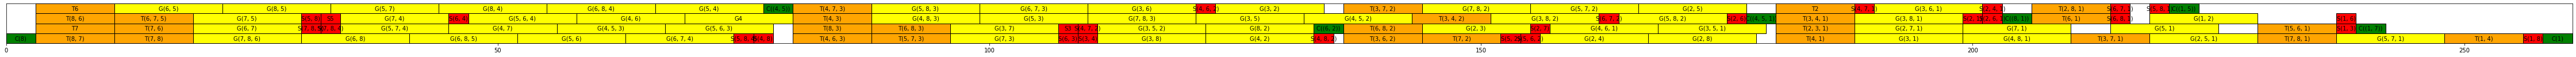

In [7]:
visualize_schedule(Processed, fig_file = 'sched_p13.png')